# Composite

1. Permite utilizar composição para criar objetos em estrutura de árvores
2. Objetos composite: objetos que têm filhos (mais complexo) - Nós internos
3. Objetos Leaft: não têm filhos. Geralmente são eles que fazem o trabalho (mais simples) - Nós externos

### Comportamento

1. Uma interface abstrata é implementada tanto por uma classe Composite quanto por uma classe Leaf
2. Na classe Composite, que terá filhas, ela irá delegar as operações para suas filhas
3. N classe Leaf, as operações serão executadas

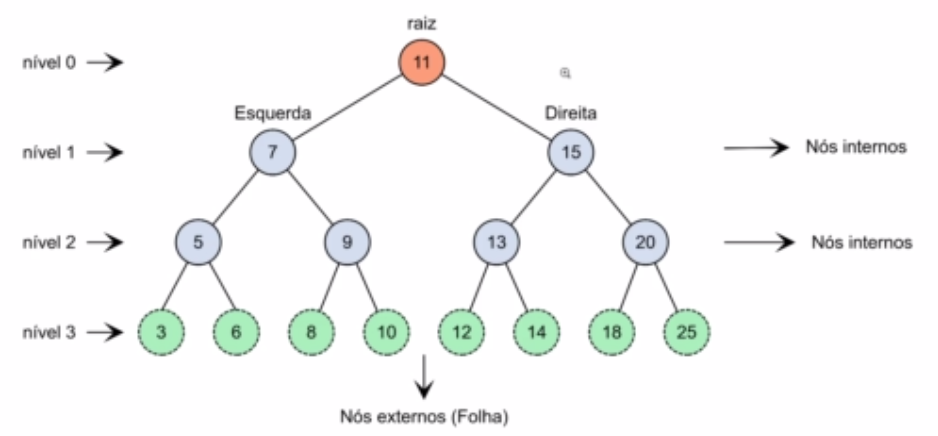

### Exemplos
1. Caixa: composite
2. Produto: teoria

In [1]:
from __future__ import annotations
from abc import ABC, abstractmethod
from typing import List

In [2]:
class AbstractBox(ABC):

    @abstractmethod
    def show_content(self) -> None: pass

    @abstractmethod
    def get_price(self) -> float: pass

    @abstractmethod
    def add(self, child: AbstractBox) -> None: pass

    @abstractmethod
    def remove(self, child: AbstractBox) -> None: pass


### Composite

In [3]:
class Box(AbstractBox):
    """
    Composite
    """

    def __init__(self, name):
        self._name = name
        self._children: List[AbstractBox] = []

    def show_content(self) -> None:
        print(f'\nProdutos da caixa {self._name}:')
        for child in self._children:
            child.show_content()

    def get_price(self) -> float:
        return sum([child.get_price() for child in self._children])

    def add(self, child: AbstractBox) -> None:
        self._children.append(child)

    def remove(self, child: AbstractBox) -> None:
        if child in self._children:
            self._children.remove(child)


### Leaf

In [4]:
class Product(AbstractBox):

    def __init__(self, name: str, price: float) -> None:
        self.name = name
        self.price = price

    def show_content(self) -> None:
        print(f'The product {self.name} costs R${self.price:.2f}')

    def get_price(self) -> float:
        return self.price

    def add(self, child: AbstractBox) -> None:
        print('You cannot add a child to a leaf')

    def remove(self, child: AbstractBox) -> None:
        print('You cannot remove a child from a leaf')


### Declarando Leaves

In [5]:
shirt = Product('Adidas White Shirt', 50.00)
notebook = Product('Notebook Acer Linux', 3150.40)
smartphone = Product('Samsumg Node 10', 1449.90)
mob = Product('Mob', 25.5)
vaccum = Product('Vaccum cleaner', 149.9)

### Declarando composities

In [6]:
cart = Box('Shopping Cart')
gifts = Box('Products for gift')
house = Box('House products')

### Fazendo a estrutura hierárquica

#### Adicionando produtos à caixa principal

In [7]:
cart.add(shirt)
cart.add(notebook)
cart.add(smartphone)

#### Adicionando produtos à caixa presente

In [8]:
gifts.add(shirt)
gifts.add(notebook)

In [9]:
house.add(mob)
house.add(vacuum)

NameError: name 'vacuum' is not defined

#### Adicionando caixas dentro de caixas

In [ ]:
cart.add(gifts)
cart.add(house)

### Executanto o código

In [10]:
cart.show_content()
print('-'*55)
print(f'The total price of your shopping cart is R${cart.get_price():.2f}')
print('-'*55)
print(f'You are spending R${gifts.get_price():.2f} just on gifts')
print(f'You are spending R${house.get_price():.2f} on house products')


Produtos da caixa Shopping Cart:
The product Adidas White Shirt costs R$50.00
The product Notebook Acer Linux costs R$3150.40
The product Samsumg Node 10 costs R$1449.90
-------------------------------------------------------
The total price of your shopping cart is R$4650.30
-------------------------------------------------------
You are spending R$3200.40 just on gifts
You are spending R$25.50 on house products
